In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

In [22]:
small_psfs = glob.glob("psfccfbtf170075_*.fits")
trail_psfs = glob.glob("psfccfbte210072_*.fits")
distorted_psfs = glob.glob("psfccfbvc170118_*.fits")

In [23]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [24]:
import sys

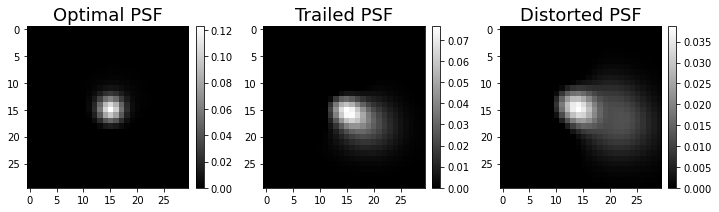

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(10, 10))

# fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=100, hspace=None)
def clamp_less_than_zero_values(psf):
    psf[psf < 0.0] = sys.float_info.epsilon
    return psf

divider = make_axes_locatable(ax[0])
cax1 = divider.append_axes('right', size='5%', pad=0.1)
mat1 = fits.getdata(small_psfs[0])
mat1 = clamp_less_than_zero_values(mat1)
show1 = ax[0].matshow(mat1, cmap='gray');
ax[0].xaxis.set_ticks_position("bottom")
ax[0].set_title("Optimal PSF", {'fontsize': 18})
c1 = fig.colorbar(show1, cax=cax1)

divider = make_axes_locatable(ax[1])
cax2 = divider.append_axes('right', size='5%', pad=0.1)
mat2 = fits.getdata(trail_psfs[0])
mat2 = clamp_less_than_zero_values(mat2)
show2 = ax[1].matshow(mat2, cmap='gray');
ax[1].xaxis.set_ticks_position("bottom")
ax[1].set_title("Trailed PSF", {'fontsize': 18})
c2 = fig.colorbar(show2, cax=cax2)

divider = make_axes_locatable(ax[2])
cax3 = divider.append_axes('right', size='5%', pad=0.1)
mat3 = fits.getdata(distorted_psfs[0])
mat3 = clamp_less_than_zero_values(mat3)
show3 = ax[2].matshow(mat3, cmap='gray');
ax[2].xaxis.set_ticks_position("bottom")
ax[2].set_title("Distorted PSF", {'fontsize': 18})
c3 = fig.colorbar(show3, cax=cax3)

fig.tight_layout()

plt.savefig("psfMatShow.png", dpi=400, bbox_inches='tight')